<a href="https://colab.research.google.com/github/Tripathianiket02/aniket/blob/main/Image%20to%20pencil%20sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

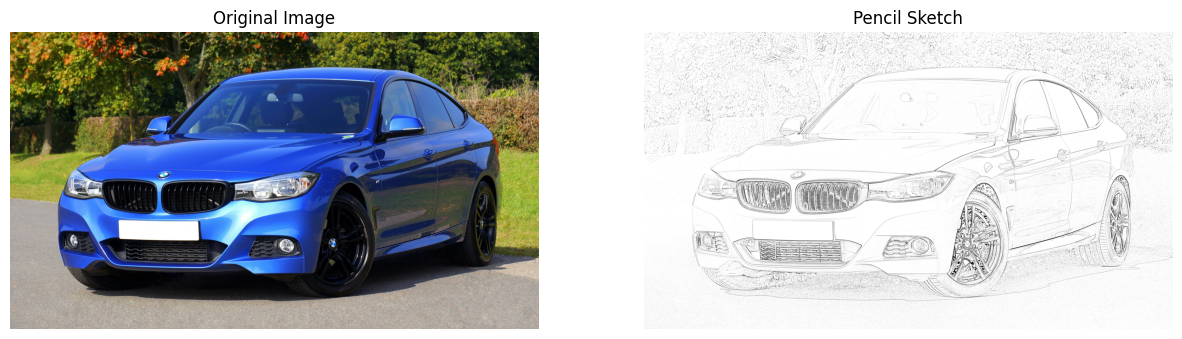

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dodgeV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)

def pencil_sketch(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image
    img_gray_inv = cv2.bitwise_not(img_gray)

    # Apply Gaussian blur to the inverted image
    img_blur = cv2.GaussianBlur(img_gray_inv, (21, 21), sigmaX=0, sigmaY=0)

    # Blend the grayscale image with the blurred inverted image
    img_blend = dodgeV2(img_gray, img_blur)

    return img_blend

# Load an image and convert it to a pencil sketch
image_path = '/content/road-car.jpg'
pencil_sketch_img = pencil_sketch(image_path)

# Display the original and pencil sketch images
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
original_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

ax[0].imshow(original_img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(pencil_sketch_img, cmap='gray')
ax[1].set_title('Pencil Sketch')
ax[1].axis('off')

plt.show()
